**Задание**

Выбор датасета:

Четный номер в группе - Датасет [о вине](https://www.kaggle.com/datasets/davorbudimir/winedataset)

Нечетный номер в группе - Датасет [про диабет](https://www.kaggle.com/datasets/abdallamahgoub/diabetes/data)

- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.
- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.
- Реализуйте метод k-ближайших соседей ****без использования сторонних библиотек, кроме NumPy и Pandas.
- Постройте две модели k-NN с различными наборами признаков:
    - Модель 1: Признаки случайно отбираются .
    - Модель 2: Фиксированный набор признаков, который выбирается заранее.
- Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.


### k-nearest neighbors 

In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [108]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallamahgoub/diabetes")

print("Path to dataset files:", path)

Path to dataset files: /Users/kseniaignateva/.cache/kagglehub/datasets/abdallamahgoub/diabetes/versions/1


In [ ]:
file_name = 'diabetes.csv'
df = pd.read_csv(f'{path}/{file_name}')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    0 non-null      int64  
 1   Glucose        0 non-null      int64  
 2   BloodPressure  0 non-null      int64  
 3   SkinThickness  0 non-null      int64  
 4   Insulin        0 non-null      int64  
 5   BMI            0 non-null      float64
 6   Pedigree       0 non-null      float64
 7   Age            0 non-null      int64  
 8   Outcome        0 non-null      int64  
dtypes: float64(2), int64(7)
memory usage: 0.0 bytes


In [17]:
if df.isna().any().any():
    df.dropna(inplace=True)
else:
    print('there are no empty values')

there are no empty values


In [48]:
counter = 0
for col in df.columns:
    if df[col].dtype == 'object' or isinstance(df[col].dtype, pd.CategoricalDtype):
        counter+=1
        print(f"- {col}")
if counter == 0:
    print('there are no categorical columns ')
        

there are no categorical columns 


In [44]:
std_col, n_col = [], []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        std = np.std(df[col], ddof=0)
        std_col.append(std)
        n_col.append(col)
for j in range(len(n_col)):
    print(f"{n_col[j]} : {std_col[j]}.")

Pregnancies : 3.3673836124089958.
Glucose : 31.95179590820272.
BloodPressure : 19.343201628981696.
SkinThickness : 15.941828626496939.
Insulin : 115.16894926467262.
BMI : 7.87902573154013.
Pedigree : 0.3311128160286291.
Age : 11.752572645994181.
Outcome : 0.47664076087820645.


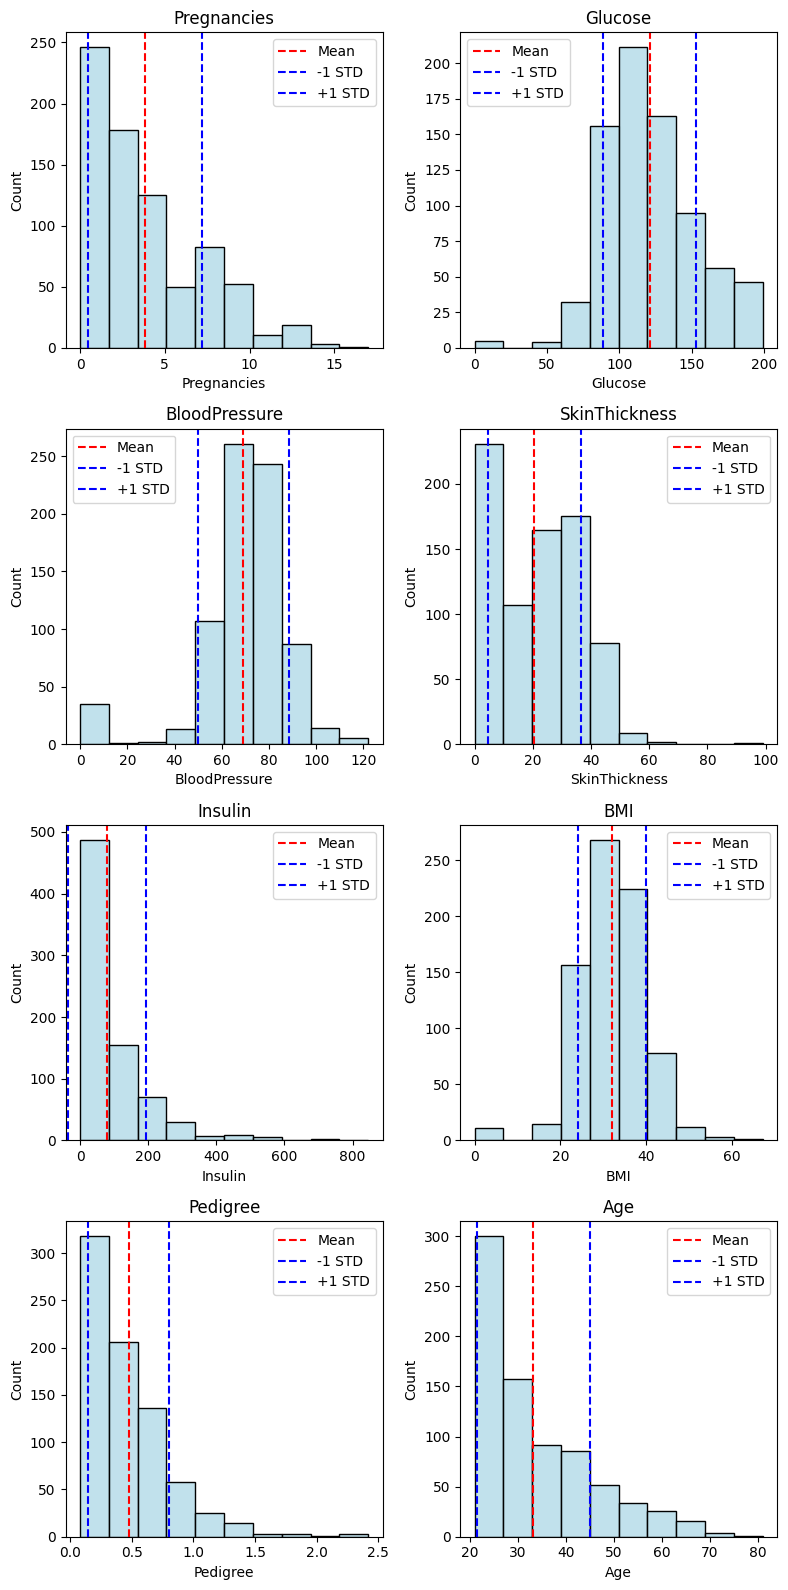

In [71]:
import math

rows_count = df.shape[0]
cols_count = df.shape[1]

means = df.mean()
sample_variance = np.sum(np.power(df - means, 2)) / (rows_count - 1)
sample_std = np.sqrt(sample_variance)
mins = df.min()
maxs = df.max()

bins_count = 1 + int(math.log2(rows_count))

titles = df.columns
fig, axes = plt.subplots(4, 2, figsize=(8, 16))  
axes = axes.flatten()

for i, column in enumerate(titles):
    if column == "Outcome": continue
    if i >= len(df.columns): 
        break

    sns.histplot(df[column], bins=bins_count, kde=False, ax=axes[i], edgecolor="black", color="lightblue")
    
    axes[i].axvline(means[column], color="red", linestyle="--", label="Mean")
    axes[i].axvline(means[column] - sample_std[column], color="blue", linestyle="--", label="-1 STD")
    axes[i].axvline(means[column] + sample_std[column], color="blue", linestyle="--", label="+1 STD")
    
    axes[i].set_title(column, fontsize=12)
    axes[i].legend()

fig.tight_layout()
plt.show()


In [46]:
# std_values = df.std(numeric_only=True)

# std_df = pd.DataFrame({
#     "Feature": std_values.index,
#     "Standard Deviation": std_values.values
# })

# plt.figure(figsize=(8, 6))
# sns.barplot(data=std_df, x="Feature", y="Standard Deviation", palette="viridis")
# plt.title("Standard Deviation of Features", fontsize=16)
# plt.xlabel("Features", fontsize=12)
# plt.ylabel("Standard Deviation", fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

replace irrelevant zero values to mean values 

In [11]:
for col in df.columns[1:-3]:
    df[col].replace(0,np.NaN, inplace=True)
    df[col].fillna(round(df[col].mean(skipna=True)), inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


correlation with Outcome:
Outcome          1.000000
Glucose          0.466581
BMI              0.292695
Age              0.238356
Pregnancies      0.221898
Pedigree         0.173844
Insulin          0.130548
SkinThickness    0.074752
BloodPressure    0.065068
Name: Outcome, dtype: float64


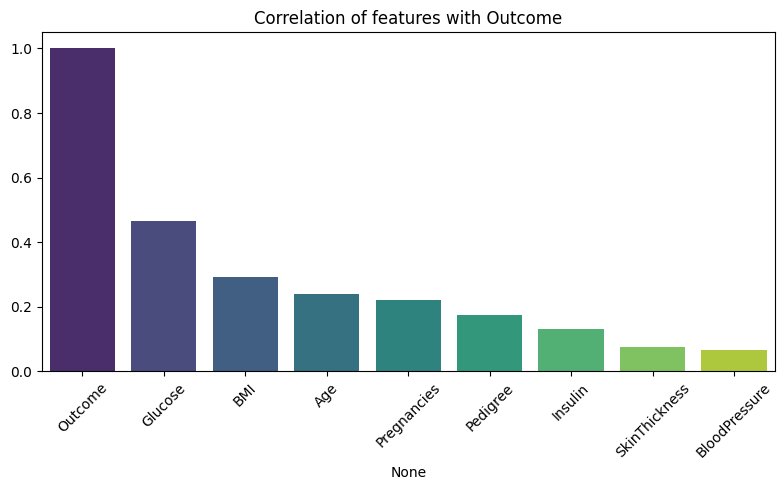

In [122]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Outcome"].sort_values(ascending=False)

print("correlation with Outcome:")
print(correlation_with_target)

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")
plt.title("Correlation of features with Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


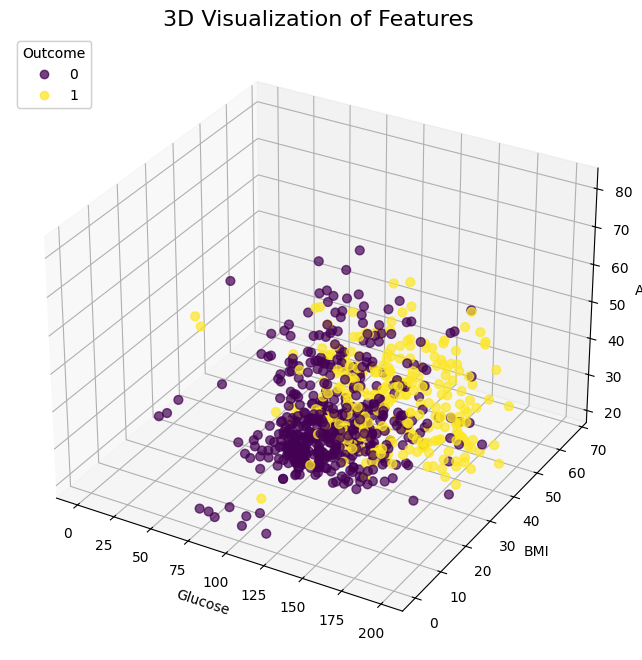

In [123]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

x = df["Glucose"]
y = df["BMI"]
z = df["Age"]
color = df["Outcome"]

scatter = ax.scatter(x, y, z, c=color, cmap="viridis", alpha=0.7, s=40)
ax.set_title("3D Visualization of Features", fontsize=16)
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")
ax.set_zlabel("Age")

legend = plt.legend(*scatter.legend_elements(), title="Outcome", loc="upper left")
ax.add_artist(legend)

plt.show()


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed = scaler.fit_transform(df)
df_processed

X = np.delete(df_processed, 8, axis=1)
y = df_processed[:, 8]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print(X_train.shape)
print(y_train.shape)


(614, 8)
(614,)


### knn model 
- Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.
- Постройте две модели k-NN с различными наборами признаков:
    - Модель 1: Признаки случайно отбираются .
    - Модель 2: Фиксированный набор признаков, который выбирается заранее.
- Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

In [156]:
def knn_predict(train_X, train_y, test_X, k, distance_metric="euclidean", weighted=False):
    predictions = []
    for test_point in test_X:
        if distance_metric == "euclidean":
            distances = np.sqrt(np.sum((train_X - test_point) ** 2, axis=1))
        elif distance_metric == "manhattan":
            distances = np.sum(np.abs(train_X - test_point), axis=1)
        else:
            raise ValueError("Unsupported distance metric")
        
        k_neighbors = np.argsort(distances)[:k]
        k_labels = train_y[k_neighbors]
        
        if weighted:
            weights = 1 / (distances[k_neighbors] + 1e-5) 
            weighted_counts = np.zeros(np.max(train_y) + 1)
            for idx, label in enumerate(k_labels):
                weighted_counts[label] += weights[idx]
            predictions.append(np.argmax(weighted_counts))
        else:
            predictions.append(np.bincount(k_labels).argmax())
    return np.array(predictions)

In [160]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate_weighted_knn(X, y, k_values, distance_metrics, weighted_options, num_splits=5):
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=88)
    results = []

    for k in k_values:
        for distance_metric in distance_metrics:
            for weighted in weighted_options:
                accuracies = []
                for train_idx, val_idx in kf.split(X):
                    X_train, X_val = X[train_idx], X[val_idx]
                    y_train, y_val = y[train_idx], y[val_idx]

                    y_pred = knn_predict(X_train, y_train, X_val, k, distance_metric, weighted)
                    accuracy = accuracy_score(y_val, y_pred)
                    accuracies.append(accuracy)
                
                mean_accuracy = np.mean(accuracies)
                results.append({
                    "k": k,
                    "distance_metric": distance_metric,
                    "weighted": weighted,
                    "mean_accuracy": mean_accuracy
                })

    return results

In [161]:
# define hyperparameter ranges
k_values = [3, 5, 7, 10, 12, 15, 20]
distance_metrics = ["euclidean", "manhattan"]
weighted_options = [False, True]

# perform cross-validation
cv_results = pd.DataFrame(cross_validate_weighted_knn(
    X_train.astype(int), 
    y_train.astype(int), 
    k_values, 
    distance_metrics, 
    weighted_options
))

# find the best result
best_result = cv_results.loc[cv_results["mean_accuracy"].idxmax()]
print("Best Hyperparameters:")
print(f"k: {best_result['k']}")
print(f"Distance Metric: {best_result['distance_metric']}")
print(f"Weighted: {best_result['weighted']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']:.2f}")

Best Hyperparameters:
k: 10
Distance Metric: euclidean
Weighted: True
Mean Accuracy: 0.72


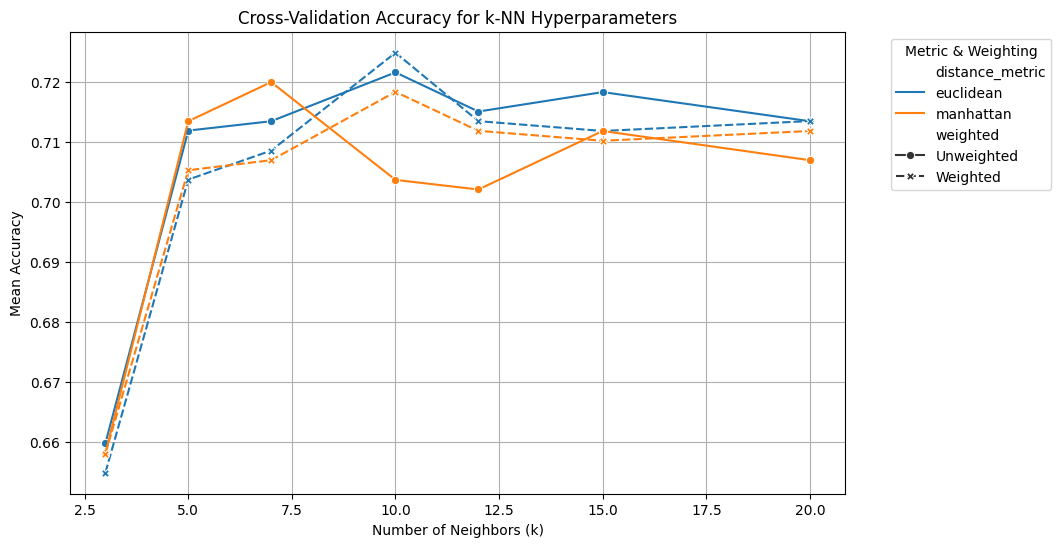

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(cv_results)

results_df["weighted"] = results_df["weighted"].map({True: "Weighted", False: "Unweighted"})

# plot accuracy for different k values
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x="k",
    y="mean_accuracy",
    hue="distance_metric",
    style="weighted",
    markers=True,
    dashes=True # explicitly differentiates between line styles
)
plt.title("Cross-Validation Accuracy for k-NN Hyperparameters")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.legend(title="Metric & Weighting", bbox_to_anchor=(1.05, 1), loc='upper left') # bbox_to_anchor move the legend outside the plot
plt.show()


In [167]:

from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_knn_model(X_train, y_train, X_test, y_test, k_values, features, distance_metric, weighted):
    """
    evaluate a k-NN model on given train/test datasets using specified features, k-values, and settings
    """
    results = {}
    for k in k_values:
        # subset features
        train_subset = X_train[:, features]
        test_subset = X_test[:, features]
        
        # predictions
        y_pred = knn_predict(train_subset, y_train, test_subset, k, 
                                       distance_metric=distance_metric, weighted=weighted)
        
        # calculate metrics
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        # store results
        results[k] = {"confusion_matrix": cm, "accuracy": accuracy}
    
    return results

def print_results(results, model_name):
    """
    print the evaluation results for a model
    """
    for k, metrics in results.items():
        print(f"\nResults for k = {k} ({model_name}):")
        print("Confusion Matrix:")
        print(metrics["confusion_matrix"])
        print(f"Accuracy: {metrics['accuracy']:.2f}")

np.random.seed(88)
random_features = np.random.choice(X_train.shape[1], size=5, replace=False)
X_train_random = X_train[:, random_features]
X_test_random = X_test[:, random_features]

fixed_features = [0, 5, 7] # fixed features (Glucose, BMI, Age)
X_train_fixed = X_train[:, fixed_features]
X_test_fixed = X_test[:, fixed_features]

k_values = [3, 5, 10]
results = {}

y_train = y_train.astype(int)
y_test = y_test.astype(int)

k_values = [3, 5, 10]
distance_metric = "manhattan"
weighted = True

# evaluate models
random_model_results = evaluate_knn_model(X_train, y_train, X_test, y_test, k_values, 
                                          random_features, distance_metric, weighted)

fixed_model_results = evaluate_knn_model(X_train, y_train, X_test, y_test, k_values, 
                                         fixed_features, distance_metric, weighted)

# print results
print_results(random_model_results, "Model 1 (random features)")
print_results(fixed_model_results, "Model 2 fFixed features)")




Results for k = 3 (Model 1 (random features)):
Confusion Matrix:
[[81 24]
 [28 21]]
Accuracy: 0.66

Results for k = 5 (Model 1 (random features)):
Confusion Matrix:
[[83 22]
 [24 25]]
Accuracy: 0.70

Results for k = 10 (Model 1 (random features)):
Confusion Matrix:
[[88 17]
 [25 24]]
Accuracy: 0.73

Results for k = 3 (Model 2 fFixed features)):
Confusion Matrix:
[[77 28]
 [22 27]]
Accuracy: 0.68

Results for k = 5 (Model 2 fFixed features)):
Confusion Matrix:
[[80 25]
 [25 24]]
Accuracy: 0.68

Results for k = 10 (Model 2 fFixed features)):
Confusion Matrix:
[[82 23]
 [24 25]]
Accuracy: 0.69
